In [60]:
import numpy as np

import csv

import random

import matplotlib.pyplot as plt

import json

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [49]:
# data path
# https://drive.google.com/uc?id=1wd8KaeCSHxt-nEpMeuHFSNWrDp8joUXJ

In [50]:
# varibles for easy tuning

file_path = "./training_cleaned.csv"

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

num_epochs = 30


In [51]:
corpus = []
num_sentences = 0

# fetching and spliting the data between sentences and labels
with open(file_path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        
        num_sentences = num_sentences + 1
        corpus.append(list_item)

sentences=[]
labels=[]

# reducing overfiting
random.shuffle(corpus)

for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

In [52]:
# spliting data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#creating the dictionaire
tokenizer = Tokenizer(num_words=vocab_size, 
                      oov_token=oov_tok
)
tokenizer.fit_on_texts(training_sentences)

# text to sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# padding
training_padded = pad_sequences(training_sequences, 
                                maxlen = max_length, 
                                padding = padding_type, 
                                truncating = trunc_type
)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen = max_length, 
                               padding = padding_type, 
                               truncating = trunc_type
)


In [53]:
# model creation
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        vocab_size, 
        embedding_dim, 
        input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
# model compiling
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [55]:
# fixing for tensoflow 2.0+
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [56]:
# model fitting
history = model.fit(
    training_padded, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(
        testing_padded, 
        testing_labels
    ), 
    verbose=1
)

Epoch 1/30
625/625 [==============================] - 40s 59ms/step - loss: 0.5817 - accuracy: 0.6951
Epoch 2/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4946 - accuracy: 0.7638
Epoch 3/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4745 - accuracy: 0.7729
Epoch 4/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4661 - accuracy: 0.7790
Epoch 5/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4569 - accuracy: 0.7840
Epoch 6/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4473 - accuracy: 0.7890
Epoch 7/30
625/625 [==============================] - 37s 59ms/step - loss: 0.4372 - accuracy: 0.7958
Epoch 8/30
625/625 [==============================] - 37s 58ms/step - loss: 0.4260 - accuracy: 0.8015
Epoch 9/30
625/625 [==============================] - 37s 58ms/step - loss: 0.4155 - accuracy: 0.8091
Epoch 10/30
625/625 [==============================] - 37s 59ms/step - loss: 0.406

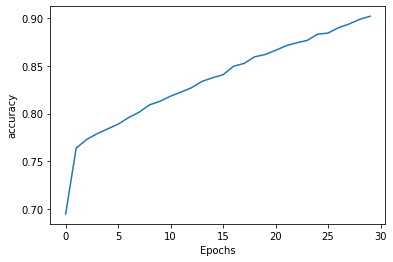

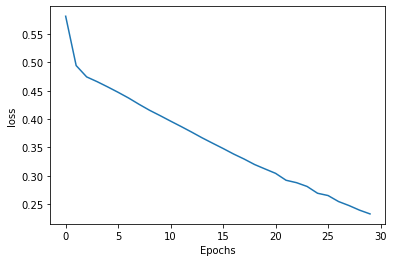

In [67]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
# model.save("test.h5")